In [42]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# load local model file and initialize model class
from DynLaborFertModel import DynLaborFertModelClass
model = DynLaborFertModelClass(par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3}) # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim

In [48]:
%time model.solve()

10it [03:12, 19.25s/it]

CPU times: total: 3min 10s
Wall time: 3min 12s


In [49]:
model.simulate()

## Question 1

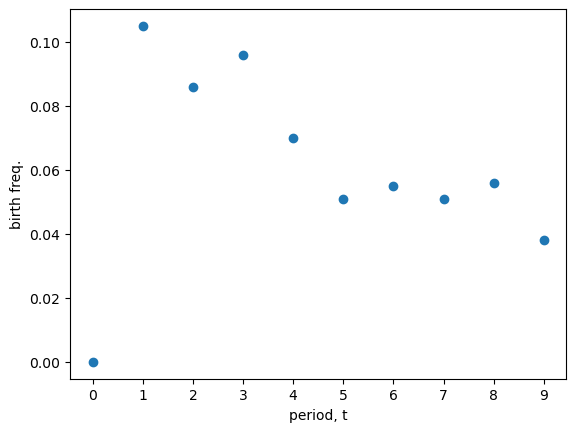

In [15]:
# birth
birth = np.zeros(sim.n.shape,dtype=np.int_)
birth[:,1:] = (sim.n[:,1:] - sim.n[:,:-1]) > 0
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.mean(birth,axis=0))
ax.set(xlabel='period, t',ylabel=f'birth freq.',xticks=range(par.simT));

In [17]:

model1 = model.copy()
par1 = model1.par
sol1 = model1.sol
sim1 = model1.sim

In [ ]:


# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Beta', 'Event Hours Rel'])

for beta in  np.linspace(0.02,0.08,7):


    par1.beta_1 = beta
    
    model1.solve()
    model1.simulate()

    birth = np.zeros(sim1.n.shape,dtype=np.int_)
    birth[:,1:] = (sim1.n[:,1:] - sim1.n[:,:-1]) > 0

    periods = np.tile([t for t in range(par1.simT)],(par1.simN,1))
    time_of_birth = np.max(periods * birth, axis=1)
    I = time_of_birth>0
    time_of_birth[~I] = -1000 # never has a child
    time_since_birth = periods - np.transpose(np.tile(time_of_birth , (par1.simT,1)))
    min_time = -8
    max_time = 8
    event_grid = np.arange(min_time,max_time+1)
    event_hours = np.nan + np.zeros(event_grid.size)
    for t,time in enumerate(event_grid):
        event_hours[t] = np.mean(sim1.h[time_since_birth==time])
    event_hours_rel = event_hours - event_hours[event_grid==-1]

    # Add the values to the DataFrame
    df.loc[len(df)] = [beta, event_hours_rel[8]]

# Print the DataFrame
print(df)

10it [02:10, 13.06s/it]
10it [02:09, 12.99s/it]
10it [02:10, 13.02s/it]
10it [02:11, 13.12s/it]
10it [02:11, 13.11s/it]
10it [02:11, 13.10s/it]
10it [02:09, 12.91s/it]

   Beta  Event Hours Rel
0  0.02        -0.064356
1  0.03        -0.093302
2  0.04        -0.120439
3  0.05        -0.144990
4  0.06        -0.167030
5  0.07        -0.189421
6  0.08        -0.210454


10it [03:06, 18.67s/it]


NameError: name 'beta' is not defined

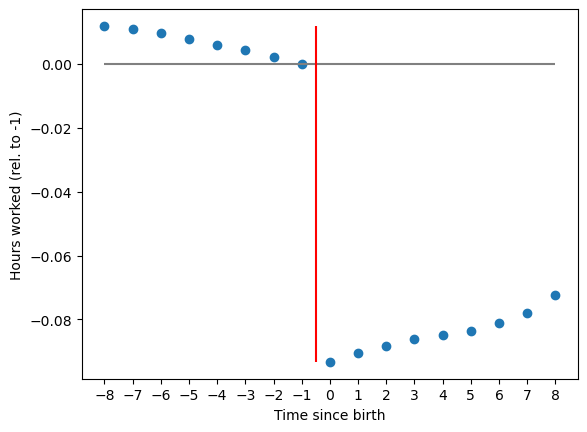

In [18]:
par1.beta_1 = 0.03

model1.solve()
model1.simulate()

birth = np.zeros(sim1.n.shape,dtype=np.int_)
birth[:,1:] = (sim1.n[:,1:] - sim1.n[:,:-1]) > 0

periods = np.tile([t for t in range(par1.simT)],(par1.simN,1))
time_of_birth = np.max(periods * birth, axis=1)
I = time_of_birth>0
time_of_birth[~I] = -1000 # never has a child
time_since_birth = periods - np.transpose(np.tile(time_of_birth , (par1.simT,1)))
min_time = -8
max_time = 8
event_grid = np.arange(min_time,max_time+1)
event_hours = np.nan + np.zeros(event_grid.size)
for t,time in enumerate(event_grid):
    event_hours[t] = np.mean(sim1.h[time_since_birth==time])
event_hours_rel = event_hours - event_hours[event_grid==-1]    

fig, ax = plt.subplots()
ax.scatter(event_grid,event_hours_rel)
ax.hlines(y=0,xmin=event_grid[0],xmax=event_grid[-1],color='gray')
ax.vlines(x=-0.5,ymin=np.nanmin(event_hours_rel),ymax=np.nanmax(event_hours_rel),color='red')
ax.set(xlabel='Time since birth',ylabel=f'Hours worked (rel. to -1)',xticks=event_grid);
plt.show()

## Question 2

In [23]:
model2 = model.copy()
par2 = model2.par
sol2 = model2.sol
sim2 = model2.sim

par2.spouse_dummy = 1 
model2.solve()
model2.simulate()

model2a = model.copy()
par2a = model2a.par
sol2a = model2a.sol
sim2a = model2a.sim

par2a.spouse_dummy = 1 
par2a.w_vec = 1.01*par2.w_vec
model2a.solve()
model2a.simulate()

model2b = model.copy()
par2b = model2b.par
sol2b = model2b.sol
sim2b = model2b.sim

par2b.spouse_dummy = 0
par2b.w_vec = 1.01*par.w_vec
model2b.solve()
model2b.simulate()




10it [03:19, 19.97s/it]
10it [03:19, 19.97s/it]
10it [03:07, 18.77s/it]


In [24]:
# Marshall elasticity
# theoretical (when rho=1/(1+r) and N1=N2=0)
ela_M = (1+par.eta) / (par.gamma - par.eta)

# simulate permanent increase

ela_M1_sim = (sol2a.h.mean()-sol2.h.mean())/sol2.h.mean()*100

print(f'Marshall: {ela_M:2.3f}, Simulated: {ela_M1_sim:2.3f}')


Marshall: -0.222, Simulated: -0.344


In [30]:
# Marshall elasticity
# theoretical (when rho=1/(1+r) and N1=N2=0)
ela_M = (1+par.eta) / (par.gamma - par.eta)

# simulate permanent increase
ela_base_sim = (sim2b.h.mean()-sim.h.mean())/sim.h.mean()*100
ela_M1_sim = (sim2a.h.mean()-sim2.h.mean())/sim2.h.mean()*100


print(f'Marshall: {ela_M:2.3f}, Simulated baseline: {ela_base_sim:2.3f}, Simulated with spouse: {ela_M1_sim:2.3f}')

Marshall: -0.222, Simulated baseline: -0.198, Simulated with spouse: -0.188


In [29]:
print(sim.h.mean())
print(sim2.h.mean())
print(sim2b.h.mean())
print(sim2a.h.mean())

1.4635838648038246
1.4413629260718834
1.460679048317489
1.4386472699294104


## Question 3

In [44]:
model3 = model.copy()
par3 = model3.par
sol3 = model3.sol
sim3 = model3.sim

par3.theta = 0.05
model3.solve()
model3.simulate()


5it [02:04, 22.10s/it]c:\Users\B375285\Desktop\HBafleveringer\Aflevering I\DynLaborFertModel.py:261: RuntimeWarning: overflow encountered in scalar power
  
c:\Users\B375285\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
10it [02:58, 17.90s/it]
c:\Users\B375285\Desktop\HBafleveringer\Aflevering I\DynLaborFertModel.py:311: RuntimeWarning: overflow encountered in scalar multiply
  sim.a[i,t+1] = (1+par.r)*(sim.a[i,t] + income - sim.c[i,t] - childcare_cost)
c:\Users\B375285\Desktop\HBafleveringer\Aflevering I\DynLaborFertModel.py:316: RuntimeWarning: invalid value encountered in scalar subtract
  birth = 1


## Question 5

In [45]:
model5 = model.copy()
par5 = model5.par
sol5 = model5.sol
sim5 = model5.sim


par5.spouse_dummy = 1
par5.p_spouse = 0.8
model5.solve()
model5.simulate()


10it [03:25, 20.55s/it]


In [51]:
print(sim.h.mean())
print(sim5.h.mean())

print(sim.c.mean())
print(sim5.c.mean())

1.4635838648038246
1.449172641511428
3.8337600263598857
3.8957605427854403
